In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from rslda import RSLDA, SeparateLDA

c:\Users\ellah\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:
X = np.zeros((18, 2))
X[0,:] = [21, 102]
X[1,:] = [40, 105]
X[2,:] = [35, 89]
X[3,:] = [46, 70]
X[4,:] = [61, 67]
X[5,:] = [59, 84]
X[6,:] = [50, 108]
X[7,:] = [65, 111]
X[8,:] = [48, 126]
X[9,:] = [61, 95]
X[10,:] = [82, 101]
X[11,:] = [77, 86]
X[12,:] = [78, 77]
X[13,:] = [95, 73]
X[14,:] = [102, 92]
X[15,:] = [113, 88]
X[16,:] = [103, 78]
X[17,:] = [113, 64]

y = np.array([1] * 9 + [0] * 9)
sublab = np.array(([1] * 3 + [2] * 3 + [3] * 3) * 2)

In [3]:
lda = LDA(solver='eigen', shrinkage='auto')
lda = lda.fit(X, y)
b = lda.intercept_
w = lda.coef_

lda_sub = RSLDA()
lda_sub = lda_sub.fit(X, y, sublab, toeplitz=False)

lda_sep = SeparateLDA()
lda_sep = lda_sep.fit(X, y, sublab, toeplitz=False, share_cov=False)

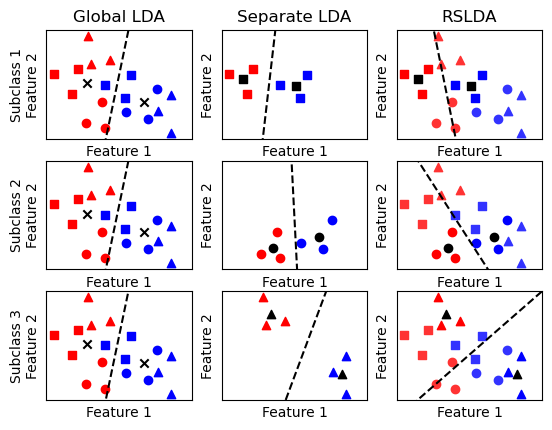

In [4]:
colors = ['b', 'r']
vague_colors = [(0.2,0.2,1), (1,0.2,0.2)]
symbols = ['s', 'o', '^']

axs_global = [plt.subplot(3,3,1), plt.subplot(3,3,4), plt.subplot(3,3,7)]
title = axs_global[0].set_title('Global LDA')
for i in range(3):
    ax_global = axs_global[i]
    for c in range(2):
        X_class = X[y==c]
        sub_class = sublab[y==c]
        for s in range(1,4):
            X_sub = X_class[sub_class==s]
            ax_global.scatter(X_sub[:,0], X_sub[:,1], color=colors[c], marker=symbols[s-1])

    w = lda.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(50, 90)
    yy = a * xx - (lda.intercept_[0]) / w[1]

    ax_global.plot(xx, yy, 'k--')
    ax_global.scatter(lda.means_[:,0], lda.means_[:,1], color='k', marker='x')

    ax_global.set_xlim([15, 130])
    ax_global.set_ylim([60, 130])
    ax_global.set_xticks([])
    ax_global.set_yticks([])
    ax_global.set_ylabel(f'Subclass {i+1}\nFeature 2', labelpad=1)
    ax_global.set_xlabel("Feature 1", labelpad=1)
    

axs_sub = [plt.subplot(3,3,3), plt.subplot(3,3,6), plt.subplot(3,3,9)]
for i in range(3):
    ax_sub = axs_sub[i]
    for c in range(2):
        X_class = X[y==c]
        sub_class = sublab[y==c]
        for s in range(1,4):
            if s == i + 1:
                color = colors[c]
            else:
                color = vague_colors[c]
            X_sub = X_class[sub_class==s]
            ax_sub.scatter(X_sub[:,0], X_sub[:,1], color=color, marker=symbols[s-1])
    ax_sub.set_xlim([15, 130])
    ax_sub.set_ylim([60, 130])
    ax_sub.set_xticks([])
    ax_sub.set_yticks([])
    ax_sub.set_xlabel("Feature 1", labelpad=1)
    ax_sub.set_ylabel("Feature 2", labelpad=1)

for i in range(1,4):
    sublda = lda_sub.subLDA[i]
    w = sublda['w']
    a = -w[0] / w[1]
    xx = np.linspace(20, 130)
    yy = a * xx - (sublda['b']) / w[1]

    axs_sub[i-1].plot(xx, yy, color='k', linestyle="--")
    axs_sub[i-1].scatter(lda_sub.M_ests[i][:,0], lda_sub.M_ests[i][:,1], color='k', marker=symbols[i-1])

axs_sub[0].set_title('RSLDA')

axs_sep = [plt.subplot(3,3,2), plt.subplot(3,3,5), plt.subplot(3,3,8)]
for i in range(3):
    ax_sep = axs_sep[i]
    for c in range(2):
        X_class = X[y==c]
        sub_class = sublab[y==c]
        X_sub = X_class[sub_class==i+1]
        ax_sep.scatter(X_sub[:,0], X_sub[:,1], color=colors[c], marker=symbols[i])
        ax_sep.scatter(np.mean(X_sub[:,0]), np.mean(X_sub[:,1]), color='k', marker=symbols[i])
    ax_sep.set_xlim([15, 130])
    ax_sep.set_ylim([60, 130])
    ax_sep.set_xticks([])
    ax_sep.set_yticks([])
    ax_sep.set_xlabel("Feature 1", labelpad=1)
    ax_sep.set_ylabel("Feature 2", labelpad=1)

for i in range(1,4):
    sublda = lda_sep.subLDA[i]
    w = sublda['w']
    a = -w[0] / w[1]
    xx = np.linspace(20, 130)
    yy = a * xx - (sublda['b']) / w[1]

    axs_sep[i-1].plot(xx, yy, color='k', linestyle="--")

axs_sep[0].set_title('Separate LDA')

plt.savefig('global_vs_subclass.svg')

In [5]:
from matplotlib.patches import Ellipse
import matplotlib.transforms as transforms

def confidence_ellipse(x, y, ax, n_std=3.0, facecolor='none', **kwargs):
    """
    Create a plot of the covariance confidence ellipse of *x* and *y*.
    https://matplotlib.org/stable/gallery/statistics/confidence_ellipse.html

    Parameters
    ----------
    x, y : array-like, shape (n, )
        Input data.

    ax : matplotlib.axes.Axes
        The axes object to draw the ellipse into.

    n_std : float
        The number of standard deviations to determine the ellipse's radiuses.

    **kwargs
        Forwarded to `~matplotlib.patches.Ellipse`

    Returns
    -------
    matplotlib.patches.Ellipse
    """
    if x.size != y.size:
        raise ValueError("x and y must be the same size")

    cov = np.cov(x, y)
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    # Using a special case to obtain the eigenvalues of this
    # two-dimensional dataset.
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2,
                      facecolor=facecolor, **kwargs)

    # Calculating the standard deviation of x from
    # the squareroot of the variance and multiplying
    # with the given number of standard deviations.
    scale_x = np.sqrt(cov[0, 0]) * n_std
    mean_x = np.mean(x)

    # calculating the standard deviation of y ...
    scale_y = np.sqrt(cov[1, 1]) * n_std
    mean_y = np.mean(y)

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x, scale_y) \
        .translate(mean_x, mean_y)

    ellipse.set_transform(transf + ax.transData)
    return ax.add_patch(ellipse)

In [6]:
subclass = np.random.normal(0, 0.3, (2, 20))
target1 = np.random.normal(-1.5, 0.5, (2, 20))
target2_x = np.random.normal(5, 1, 20)
target2_y = np.random.normal(0.5, 1.5, 20)

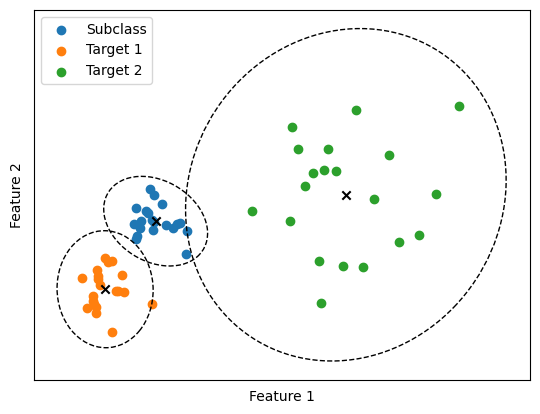

In [7]:
ax = plt.subplot(1,1,1)

ax.scatter(subclass[0,:], subclass[1,:], label='Subclass')
ax.scatter(target1[0,:], target1[1,:], label='Target 1')
ax.scatter(target2_x, target2_y, label='Target 2')
ax.scatter(np.mean(subclass, axis=1)[0], np.mean(subclass, axis=1)[1], color='k', marker='x')
ax.scatter(np.mean(target1, axis=1)[0], np.mean(target1, axis=1)[1], color='k', marker='x')
ax.scatter(np.mean(target2_x), np.mean(target2_y), color='k', marker='x')
confidence_ellipse(subclass[0,:], subclass[1,:], ax, edgecolor='k', linestyle='--')
confidence_ellipse(target1[0,:], target1[1,:], ax, edgecolor='k', linestyle='--')
confidence_ellipse(target2_x, target2_y, ax, edgecolor='k', linestyle='--')
ax.set_xticks([])
ax.set_yticks([])
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()

plt.savefig('targets.svg')